# **Credit Default Prediction Project**

## **Yahya Chammami - Bechir Ben Mabrouk**  

### 2023/2024

**Imoprating the required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import entropy

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,roc_auc_score


import os
import warnings
warnings.filterwarnings('ignore')

**Loading The Dataset**

In [ ]:
# Loading And Reading Dataset
data=pd.read_excel('/content/Base de données - SNI.xlsx')
data.head()

,numtiers,Annee,NUMTIERS_ANNEE,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,...,NIVEAU_COMPETITIVITE,QUALITE_INFORMATION_FINANCIERE,REPUTATION,STRUCTUREDUMANAGEMENT,SUPPORT,POSITIONNEMENTMARCHE,Categorie_juridique,Cote en bourse,Appartenance a un groupe,Secteurs
0,5200000007513,2015,5200000007513_2015,0,2008-01-02,1982-01-05,236073240.2,8258201.71,7120503.00,-14040379.78,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
1,5200000007513,2016,5200000007513_2016,0,2008-01-02,1982-01-05,258386615.0,4107268.85,2031311.93,2312466.82,...,Tres forte concurrence,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
2,5200000007934,2015,5200000007934_2015,0,1988-05-31,1953-08-05,202426475.2,5028464.60,3602225.77,-413273.04,...,Absence de concurrence (quasi monopole),Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Leader,SA,0,1,Industries agroalimentaires et du tabac
3,5200000007934,2017,5200000007934_2017,0,1988-05-31,1953-08-05,210917616.4,13076487.89,12514233.63,7501946.85,...,Forte presence de produits similaires et compe...,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,1,Industries agroalimentaires et du tabac
4,5200000008051,2015,5200000008051_2015,0,1998-10-02,1995-05-22,171987524.1,16142629.85,12544851.82,1401029.14,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur non significatif,SA,0,1,"Commerce, reparations automobiles et d'article..."


## **Checking Data types and Quality**

In [ ]:
data.shape

(1521, 40)

In [ ]:
data.columns

Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut',
       'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP', 'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs'],
      dtype='object')

In [ ]:
data= data.drop(columns=['NUMTIERS_ANNEE'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   numtiers                                 1521 non-null   int64         
 1   Annee                                    1521 non-null   int64         
 2   defaut                                   1521 non-null   int64         
 3   DATE_DE_CREATION_TIERS                   1521 non-null   datetime64[ns]
 4   DATE_DE_CREATION_ENTREP                  1521 non-null   datetime64[ns]
 5   CHIFFRE_AFFAIRES                         1521 non-null   float64       
 6   EXCEDENT_BRUT_EXPLOITATION               1521 non-null   float64       
 7   RESULTAT_EXPlOITATION                    1521 non-null   float64       
 8   RESULTAT_NET                             1521 non-null   float64       
 9   FINANCEMENT_PERMANENT                    

In [ ]:
data.dtypes.value_counts()

float64           20
object            12
int64              5
datetime64[ns]     2
dtype: int64

In [ ]:
catego_columns = data.select_dtypes(include='object').columns
categodf = data[catego_columns]
categodf.head()

,EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT,DIVERSITE_CLIENTS,DIVERSITE_FOURNISSEURS,IMPACT_SOCIAUX_ENVIRONNEMENTAL,NIVEAU_COMPETITIVITE,QUALITE_INFORMATION_FINANCIERE,REPUTATION,STRUCTUREDUMANAGEMENT,SUPPORT,POSITIONNEMENTMARCHE,Categorie_juridique,Secteurs
0,Entre 5 et 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,Impact social ou environnemental potentiel mai...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,Transport et Communication
1,Plus de 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,Impact social ou environnemental marginal,Tres forte concurrence,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,Transport et Communication
2,Entre 5 et 10 ans,Diversification limitee e un seul client ou un...,Tres grande diversite,"Aucun impact social ou environnemental, soumis...",Absence de concurrence (quasi monopole),Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Leader,SA,Industries agroalimentaires et du tabac
3,Plus de 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,"Aucun impact social ou environnemental, soumis...",Forte presence de produits similaires et compe...,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,Industries agroalimentaires et du tabac
4,Plus de 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur non significatif,SA,"Commerce, reparations automobiles et d'article..."


**Checking the Unique Values for categorical Variables**

In [ ]:
categories_features = list(data.select_dtypes('O').columns)

for feature in categories_features:
    if feature != 'NUMTIERS_ANNEE':
        unique_values = data[feature].unique()
        print(f"{feature} has unique values: {unique_values}\n")

EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT has unique values: ['Entre 5 et 10 ans' 'Plus de 10 ans' 'Inferieure e 5 ans' 'Modalite vide']

DIVERSITE_CLIENTS has unique values: ['Diversification tres forte par produits, clients, situation geographique'
 'Diversification limitee e un seul client ou un seul produit ou e une seule zone geographique'
 'Bonne diversification par produits mais limitee e une zone geographique ou e quelques client'
 'Forte dependance e quelques clients mais limitee e un seul produit'
 'Diversification très forte par produits,clients, situation geographique'
 'Diversification très forte par produits, clients, situation geographique'
 'Modalite vide']

DIVERSITE_FOURNISSEURS has unique values: ['Tres grande diversite' 'Diversite moyenne' 'Pas de diversite'
 'Diversite insufisante' 'Modalite vide' 'Très grande diversite']

IMPACT_SOCIAUX_ENVIRONNEMENTAL has unique values: ['Impact social ou environnemental potentiel mais reversible'
 'Impact social ou environnemental

In [ ]:
# Checking the duplicate Records
data.duplicated().sum()

0

In [ ]:
# Checking the Number of NA values
missing_counts = data.isna().sum()
# Print the columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_counts[missing_counts > 0])

Columns with missing values:
Series([], dtype: int64)


####**There is no missing values but there is values with "0" values**

In [ ]:
binary_columns= ['defaut','Cote en bourse','Appartenance a un groupe']
# Select columns of type float64 and int64 excluding binary columns
selected_columns = data.select_dtypes(include=['float64', 'int64']).columns.difference(binary_columns)
data_selected= data[selected_columns]
data_selected.head()

,ACTIF_CIRCULANT,AUTO_FINANCEMENT,Annee,BESOIN_FONDS_ROULEMENT,CAPITAUX_PROPRES,CHIFFRE_AFFAIRES,DELAI_REGLEMENT_CLIENTS,DELAI_REGLEMENT_FOURNISSEURS,DETTE_FINANCIERE,EXCEDENT_BRUT_EXPLOITATION,...,FRAIS_FINANCIERS,PASSIF_CIRCULANT,RESULTAT_EXPlOITATION,RESULTAT_NET,STOCK,TOTAL_ACTIF,TOTAL_BILAN,TOTAL_PASSIF,TRESORIE_NETTE,numtiers
0,1.404023e+08,-4431823.25,2015,1.099038e+08,94487686.39,236073240.2,151.45,114.32,101926.36,8258201.71,...,14006448.72,70573059.45,7120503.00,-14040379.78,0.00,2.025700e+08,1.983873e+08,2.025700e+08,-28384251.49,5200000007513
1,1.466761e+08,474284.79,2016,1.251023e+08,96800153.21,258386615.0,159.22,122.51,0.00,4107268.85,...,4782272.06,76380032.99,2031311.93,2312466.82,0.00,2.079430e+08,2.061276e+08,2.079430e+08,-29376222.42,5200000007513
2,4.845077e+07,245934.54,2015,1.686528e+07,25786354.28,202426475.2,70.09,60.82,0.00,5028464.60,...,1722020.99,34625711.22,3602225.77,-413273.04,6866869.76,7.541207e+07,7.541207e+07,7.541207e+07,8427387.83,5200000007934
3,5.390498e+07,8064201.11,2017,3.864704e+07,43636340.95,210917616.4,60.33,32.27,0.00,13076487.89,...,1531787.10,18773453.54,12514233.63,7501946.85,7590441.89,6.840979e+07,6.840979e+07,6.840979e+07,4909299.36,5200000007934
4,1.106311e+08,4998807.17,2015,1.029947e+08,51002844.16,171987524.1,165.57,124.06,4183633.52,16142629.85,...,6372501.19,70978735.17,12544851.82,1401029.14,15159511.73,1.750517e+08,1.708681e+08,1.750517e+08,-47906963.44,5200000008051


In [ ]:
# Print the percentage of 0 values in each column
data_selected= data[selected_columns]
data_selected.head()
percentage_zero = (data_selected == 0).mean() * 100
print("Percentage of 0 values in each column:")
print(percentage_zero.sort_values())


Percentage of 0 values in each column:
numtiers                         0.000000
Annee                            0.000000
BESOIN_FONDS_ROULEMENT           0.000000
CHIFFRE_AFFAIRES                 0.000000
FONDS_DE_ROULEMENT               0.000000
TOTAL_PASSIF                     0.065746
TOTAL_BILAN                      0.065746
PASSIF_CIRCULANT                 0.065746
TRESORIE_NETTE                   0.065746
FINANCEMENT_PERMANENT            0.065746
TOTAL_ACTIF                      0.197239
ACTIF_CIRCULANT                  0.197239
RESULTAT_EXPlOITATION            0.262985
CAPITAUX_PROPRES                 0.262985
EXCEDENT_BRUT_EXPLOITATION       0.394477
DELAI_REGLEMENT_FOURNISSEURS     0.525970
FRAIS_FINANCIERS                 0.525970
RESULTAT_NET                     0.854701
AUTO_FINANCEMENT                 1.183432
DELAI_REGLEMENT_CLIENTS          2.103879
STOCK                            4.733728
DETTE_FINANCIERE                37.015122
dtype: float64


**Dealing with the Null Values**

In [ ]:
for column in selected_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column] = data.groupby('numtiers')[column].transform(lambda x: x.replace(0, x.mean()))

**Dealing with Outlier using Z-Score**

In [ ]:
#Outliers detection with Z-score
def print_column_outliers(column, threshold=3.5):
    z_scores = np.abs(stats.zscore(column))
    outliers = column[np.abs(z_scores) > threshold]
    if not outliers.empty:
        print(f"Outliers in column '{column.name}':")
        print(outliers)

# Detect and print columns with outliers
for column in selected_columns:
    print_column_outliers(data[column])

Outliers in column 'ACTIF_CIRCULANT':
19      2.158495e+10
77      1.062897e+10
111     1.195187e+10
112     1.108264e+10
277     6.182966e+10
278     6.557718e+10
968     1.987712e+10
969     1.824590e+10
1396    1.129729e+10
1397    1.156615e+10
1492    1.035377e+10
Name: ACTIF_CIRCULANT, dtype: float64
Outliers in column 'AUTO_FINANCEMENT':
77      1.076927e+09
243     1.591254e+09
272     1.540043e+09
277     4.590074e+09
278     7.236063e+09
342     1.269638e+09
343     1.298290e+09
744     3.536727e+09
1094    1.760399e+09
1272    4.125700e+09
Name: AUTO_FINANCEMENT, dtype: float64
Outliers in column 'BESOIN_FONDS_ROULEMENT':
243     6.213575e+10
277     1.283850e+11
278     1.093830e+11
744     2.359763e+10
1272    2.377267e+10
1412    2.096857e+10
1438    6.335942e+10
Name: BESOIN_FONDS_ROULEMENT, dtype: float64
Outliers in column 'CAPITAUX_PROPRES':
243     5.003362e+10
277     6.715046e+10
278     6.598936e+10
744     1.465353e+10
1272    1.525493e+10
1438    5.194932e+10
Nam

In [ ]:
def remove_outliers(column,threshold = 3.5):
    z_scores = zscore(data[selected_columns])
    outliers = (abs(z_scores) > threshold).any(axis=1)
    data_no_outliers = data[~outliers]

# Remove outliers
for column in selected_columns:
    remove_outliers(data[column])


**Dealing with the MissWriting Values**

In [ ]:
data['DIVERSITE_CLIENTS'].replace("Diversification tres forte par produits, clients, situation geographique",'Diversification trés forte par produits, clients, situation geographique',inplace=True)
data['DIVERSITE_FOURNISSEURS'].replace('Tres grande diversite','Très grande diversite',inplace=True)
data['DIVERSITE_FOURNISSEURS'].replace('Trés grande diversite','Très grande diversite',inplace=True)
data['REPUTATION'].replace('Tres bonne','Très bonne',inplace=True)
data['NIVEAU_COMPETITIVITE'].replace('Tres forte concurrence','Très forte concurrence',inplace=True)
data['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace('Aucun impact social ou environnemental, soumis e une reglementation','Aucun impact social ou environnemental, soumis à une reglementation',inplace=True)

**Dealing with the Missing Modalities**

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='Modalite vide',strategy='most_frequent')
data=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)


In [ ]:
data['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'].replace(['Plus de 10 ans', 'Entre 5 et 10 ans', 'Inferieure e 5 ans'],(0,1,2),inplace=True)
data['DIVERSITE_FOURNISSEURS'].replace(['Pas de diversite', 'Diversite moyenne', 'Diversite insufisante', 'Très grande diversite'],(0,1,2,3),inplace=True)
data['REPUTATION'].replace(['Mauvaise', 'Moyenne', 'Bonne', 'Très bonne'],(0,1,2,3),inplace=True)
data['STRUCTUREDUMANAGEMENT'].replace(['Pas structure','Peu structure',  'Moyennement structure' ,'Bien structure'],(0,1,2,3),inplace=True)
# the Rest of the categorical Columns
label_encoder = LabelEncoder()

for column in catego_columns:
    data[column] = label_encoder.fit_transform(data[column])

## **Ratio Calculation**

In [ ]:
days_in_a_year = 365

data['Inventory Turnover '] = data['CHIFFRE_AFFAIRES'] / data['STOCK']
data['Days Held in Inventory '] = days_in_a_year / data['Inventory Turnover ']
data['Current Ratio'] = data['ACTIF_CIRCULANT'] / data['PASSIF_CIRCULANT']
data['Acid Test or Quick Ratio'] = (data['ACTIF_CIRCULANT'] - data['STOCK']) / data['PASSIF_CIRCULANT']
data['Operating Cash Flow to Current Liabilities']=data['TRESORIE_NETTE']/data['PASSIF_CIRCULANT']
data['Total Asset Turnover'] = data['CHIFFRE_AFFAIRES'] / data['TOTAL_ACTIF']

data['Days Held in Inventory '] = days_in_a_year / data['Inventory Turnover ']
data['Fixed Asset Turnover '] = data['CHIFFRE_AFFAIRES'] / (data['TOTAL_ACTIF']-data['ACTIF_CIRCULANT'])
data['Debt Ratio '] = data['DETTE_FINANCIERE'] /data['TOTAL_ACTIF']
data['Debt to Equity Ratio'] = data['DETTE_FINANCIERE'] /data['CAPITAUX_PROPRES']
data['Return on Sales'] = (data['RESULTAT_NET'] /data['CHIFFRE_AFFAIRES'])*100
data['Return on Equity'] = (data['RESULTAT_NET'] /data['CAPITAUX_PROPRES'])*100

## **Data Visualization**

**Numerical Features**

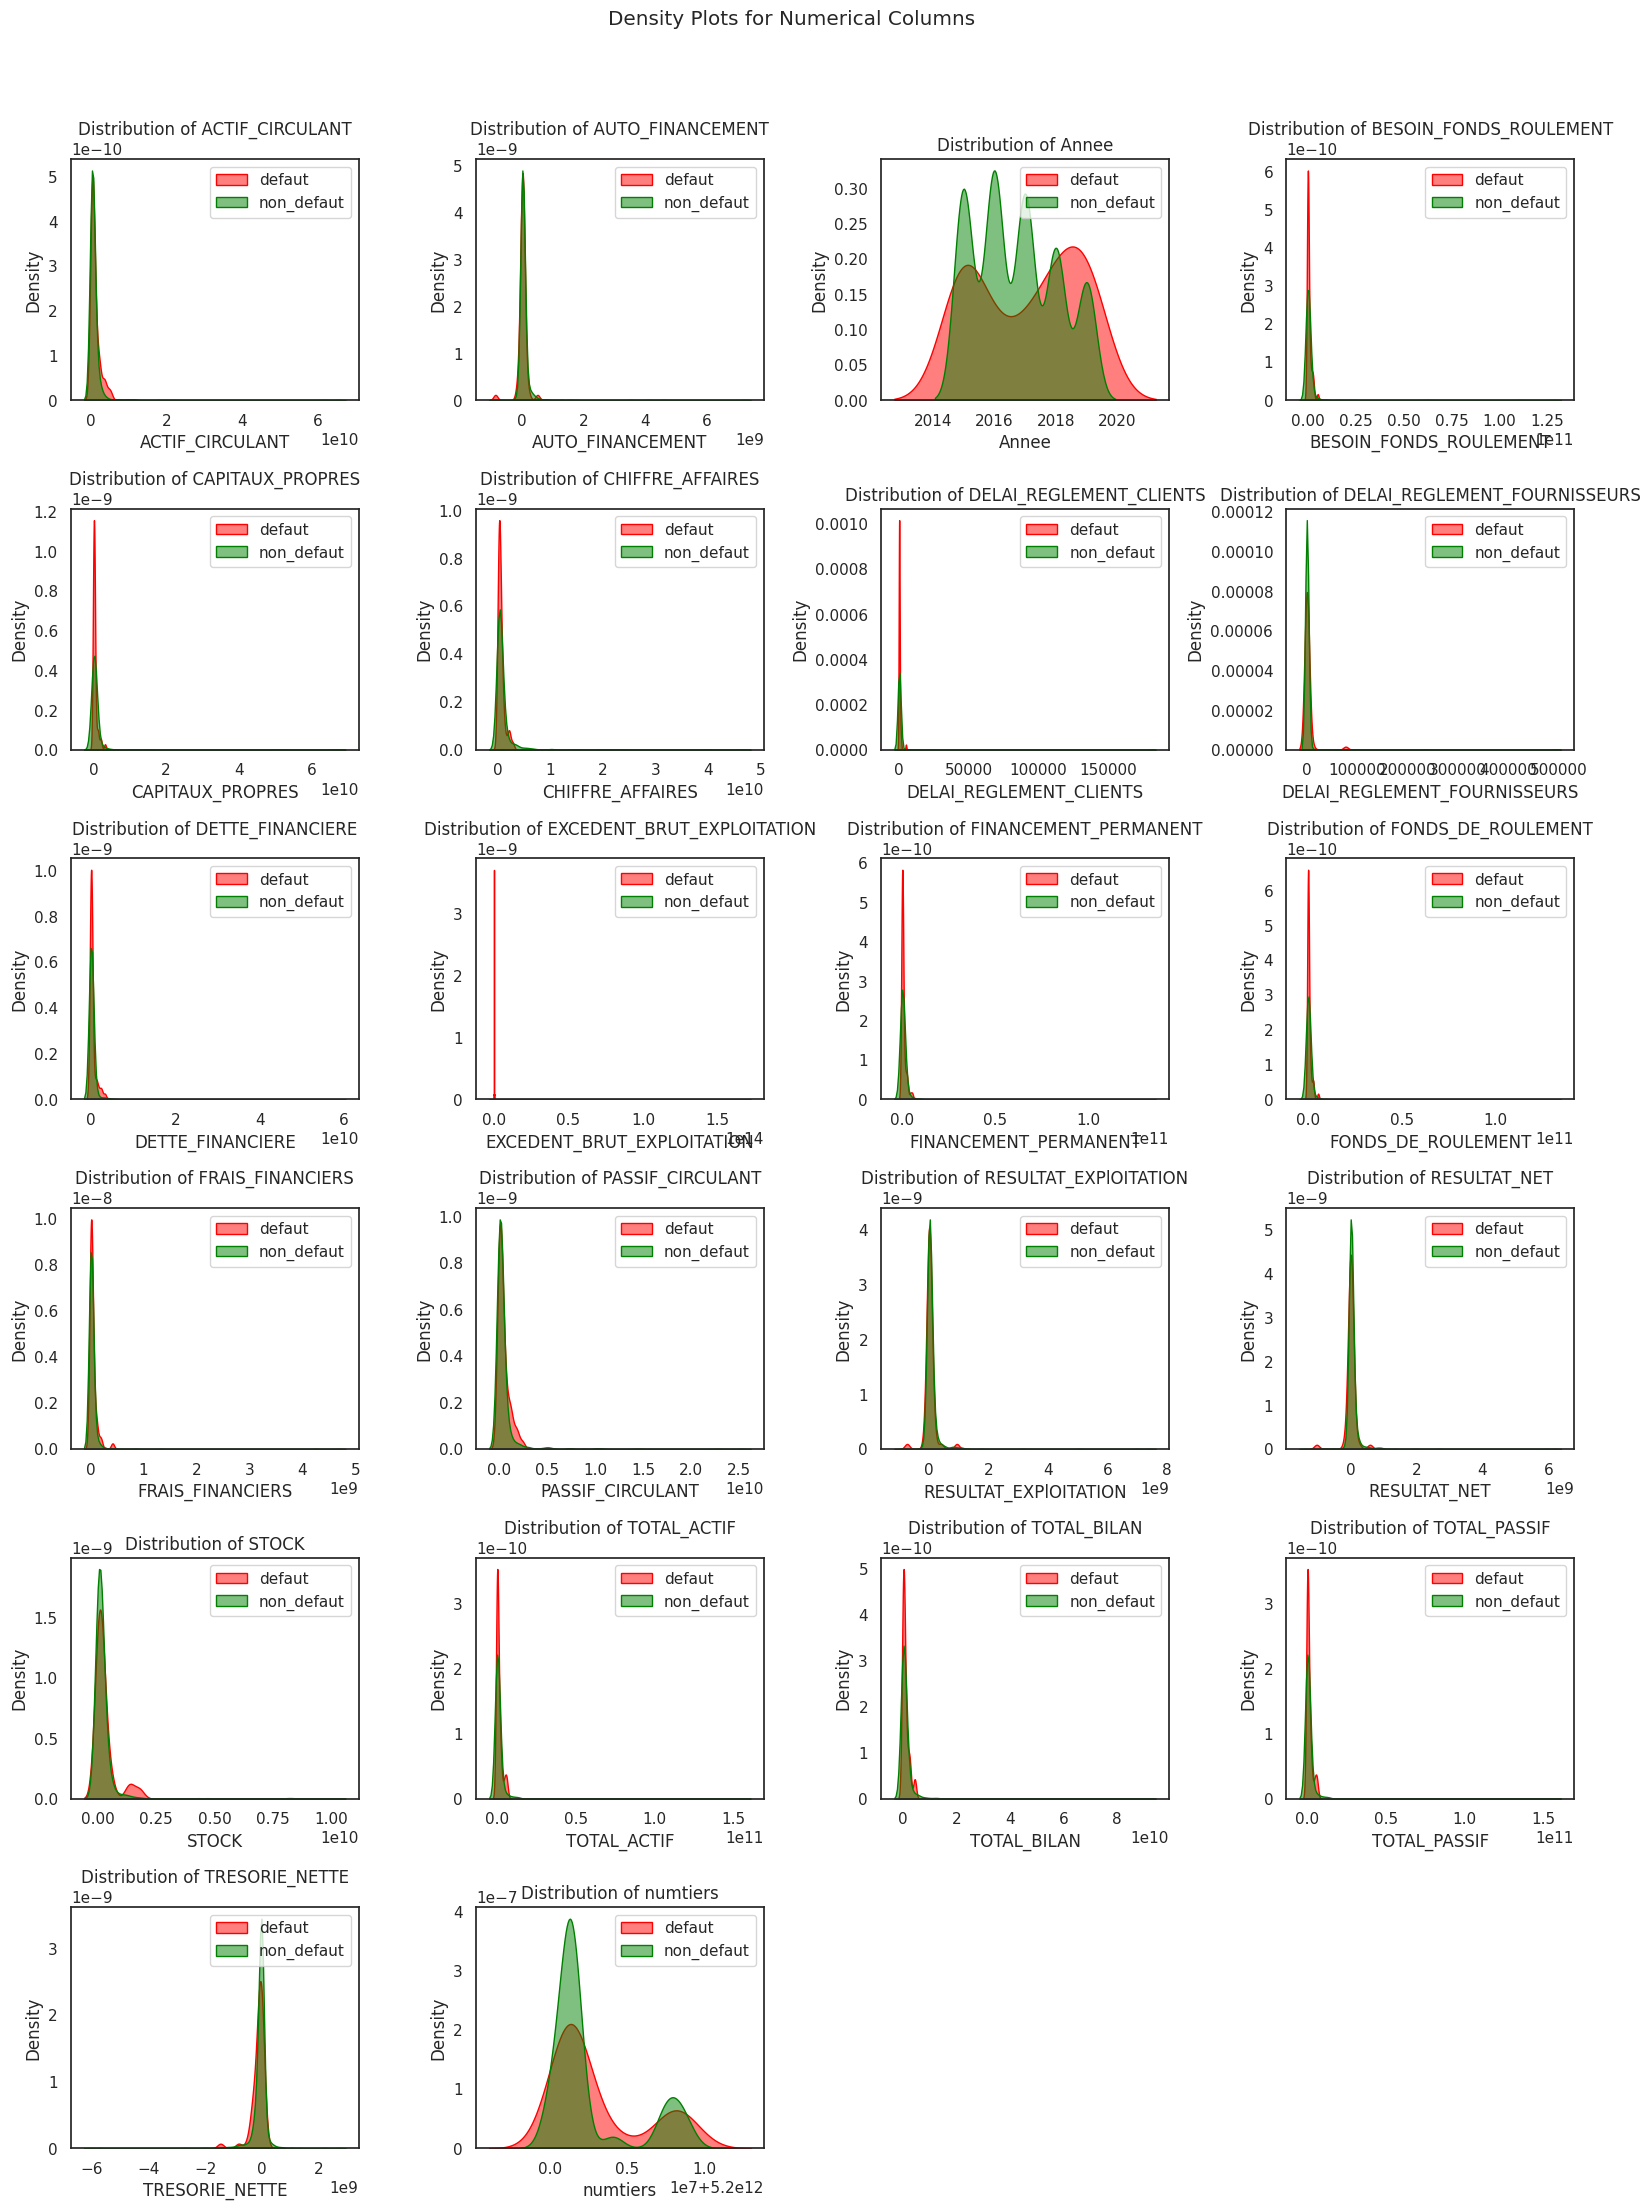

In [ ]:
class_zero = data[data['defaut']==0]
class_one = data[data['defaut']==1]
index = 0
fig, ax = plt.subplots(8, 4, figsize=(16, 28))
fig.suptitle('Density Plots for Numerical Columns', y=1.02)
for i in selected_columns:
    # Check if either class has data for the current feature
    if not class_one[i].empty or not class_zero[i].empty:
        index += 1
        plt.subplot(8, 4, index)

        # KDE plot for 'Class 1'
        sns.kdeplot(class_one[i], label='defaut', shade=True, warn_singular=False, alpha=0.5, color='red')

        # KDE plot for 'Class 0' (non-fraud transactions)
        sns.kdeplot(class_zero[i], label='non_defaut', shade=True, warn_singular=False, alpha=0.5, color='green')

        plt.title(f'Distribution of {i}')
        plt.legend()

# Remove empty subplots
for i in range(index + 1, 8 * 4 + 1):
    fig.delaxes(ax.flatten()[i - 1])

plt.tight_layout()
plt.show()


**Categorical Features**

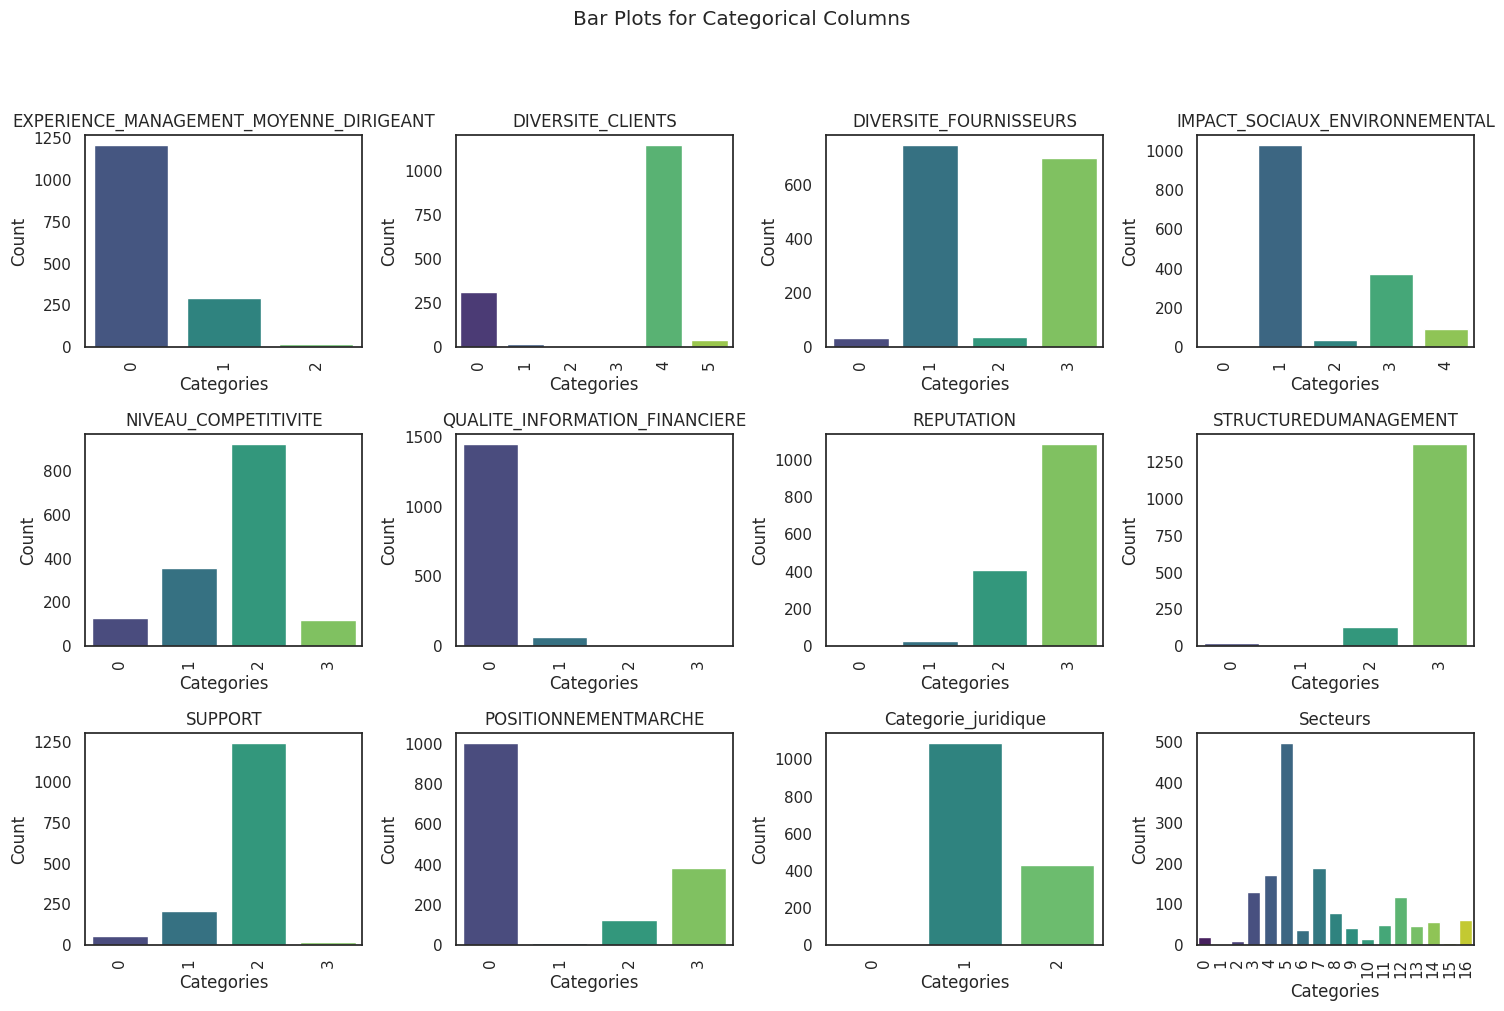

In [ ]:
num_subplots = len(catego_columns)
num_rows = 8
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.suptitle('Bar Plots for Categorical Columns', y=1.02)

# Flatten axes if num_rows and num_cols are greater than 1
axes = axes.flatten()

# Plot bar plots for each categorical column
for i, col in enumerate(catego_columns):
    # Count the occurrences of each category
    counts = data[col].value_counts()

    # Plot a bar plot using Seaborn for a colorblind-friendly palette
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')

    # Set subplot title and labels
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=90)

# Remove empty subplots if the number of subplots is less than num_rows * num_cols
for j in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Target Analysis**

In [ ]:
count = data["defaut"].value_counts()
count

0    1468
1      53
Name: defaut, dtype: int64

Text(0.5, 0.98, 'Default Probability')

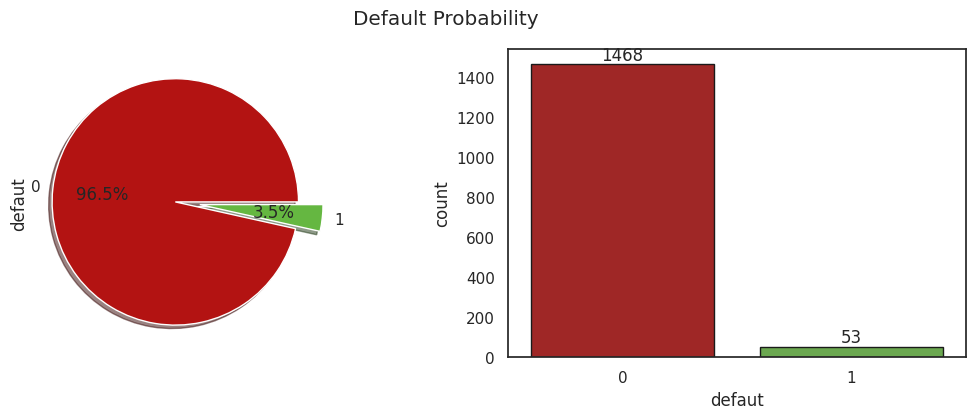

In [ ]:
# Set the Seaborn style to 'white'
sns.set(style='white')
colors = ['#B31312', '#65B741']
# Create a figure with 1 row and 2 columns
fig = plt.subplots(1, 2, figsize=(13, 4))

# Plot the pie chart in the first subplot
plt.subplot(1, 2, 1)
data["defaut"].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True,colors=colors)

# Create a countplot in the second subplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=data, x='defaut', palette=colors, edgecolor='k')

# Label the bars in the countplot
ax.bar_label(ax.containers[0])

# Set the title for the entire figure
plt.suptitle('Default Probability')


**Featurs Selection**

**Anova Test**

In [ ]:
# ANOVA Test dependance
df = data.copy()
for col in catego_columns:
    grouped_data = [df[col][df['defaut'] == category] for category in df['defaut'].unique()]
    statistic, p_value = f_oneway(*grouped_data)
    print("----------Yahiaa -----------------Bechir----------")
    print(f"Statistique de test ANOVA for {col}:", statistic)
    print("Valeur P :", p_value)



----------Yahiaa -----------------Bechir----------
Statistique de test ANOVA for EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT: 0.013422872109988509
Valeur P : 0.9077810944135611
----------Yahiaa -----------------Bechir----------
Statistique de test ANOVA for DIVERSITE_CLIENTS: 0.07884487279695573
Valeur P : 0.7789071882113163
----------Yahiaa -----------------Bechir----------
Statistique de test ANOVA for DIVERSITE_FOURNISSEURS: 1.5208315729000497
Valeur P : 0.21768449799316192
----------Yahiaa -----------------Bechir----------
Statistique de test ANOVA for IMPACT_SOCIAUX_ENVIRONNEMENTAL: 3.727041780666269
Valeur P : 0.05372407209794424
----------Yahiaa -----------------Bechir----------
Statistique de test ANOVA for NIVEAU_COMPETITIVITE: 0.364599526715024
Valeur P : 0.5460529667740786
----------Yahiaa -----------------Bechir----------
Statistique de test ANOVA for QUALITE_INFORMATION_FINANCIERE: 0.9592625810147369
Valeur P : 0.3275286994748774
----------Yahiaa -----------------Bechir-------

**Décision : Si la valeur p est significativement basse (typiquement < 0,05), cela suggère une différence significative entre les groupes définis par cette variable continue.**

**Action : Incluez les variables continues avec des valeurs p significativement basses dans votre modèle.**


**Information Value**

In [ ]:
#  l'Information Value (IV)
def calculate_iv(data, feature, target):
    cont_table = pd.crosstab(data[feature], data[target])
    # Ajouter une constante pour éviter les logarithmes de zéro
    cont_table = cont_table + 0.00001
    proportions = cont_table.div(cont_table.sum(axis=1), axis=0)
    iv_values = ((proportions[0] - proportions[1]) *
                 (np.log(proportions[0] / proportions[1]))).sum()
    return iv_values

for col in catego_columns:
  iv_catego_var = calculate_iv(df, col, 'defaut')
  print("----------Yahiaa -----------------Bechir----------")
  print(f"Information Value pour {col}: {iv_catego_var}")


----------Yahiaa -----------------Bechir----------
Information Value pour EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT: 20.328180328117455
----------Yahiaa -----------------Bechir----------
Information Value pour DIVERSITE_CLIENTS: 46.44509081000599
----------Yahiaa -----------------Bechir----------
Information Value pour DIVERSITE_FOURNISSEURS: 11.596996089052517
----------Yahiaa -----------------Bechir----------
Information Value pour IMPACT_SOCIAUX_ENVIRONNEMENTAL: 23.98517822657402
----------Yahiaa -----------------Bechir----------
Information Value pour NIVEAU_COMPETITIVITE: 12.434552243331746
----------Yahiaa -----------------Bechir----------
Information Value pour QUALITE_INFORMATION_FINANCIERE: 19.975149933386763
----------Yahiaa -----------------Bechir----------
Information Value pour REPUTATION: 9.69044582877591
----------Yahiaa -----------------Bechir----------
Information Value pour STRUCTUREDUMANAGEMENT: 22.166728018686314
----------Yahiaa -----------------Bechir----------
Info

**Décision : Si l'IV est élevé (typiquement > 0,1), cela suggère que la variable est informative pour prédire la variable cible.**

**Action : Incluez les variables catégorielles avec des valeurs d'IV élevées dans votre modèle.**



**Corrolation Analysis**

<Axes: >

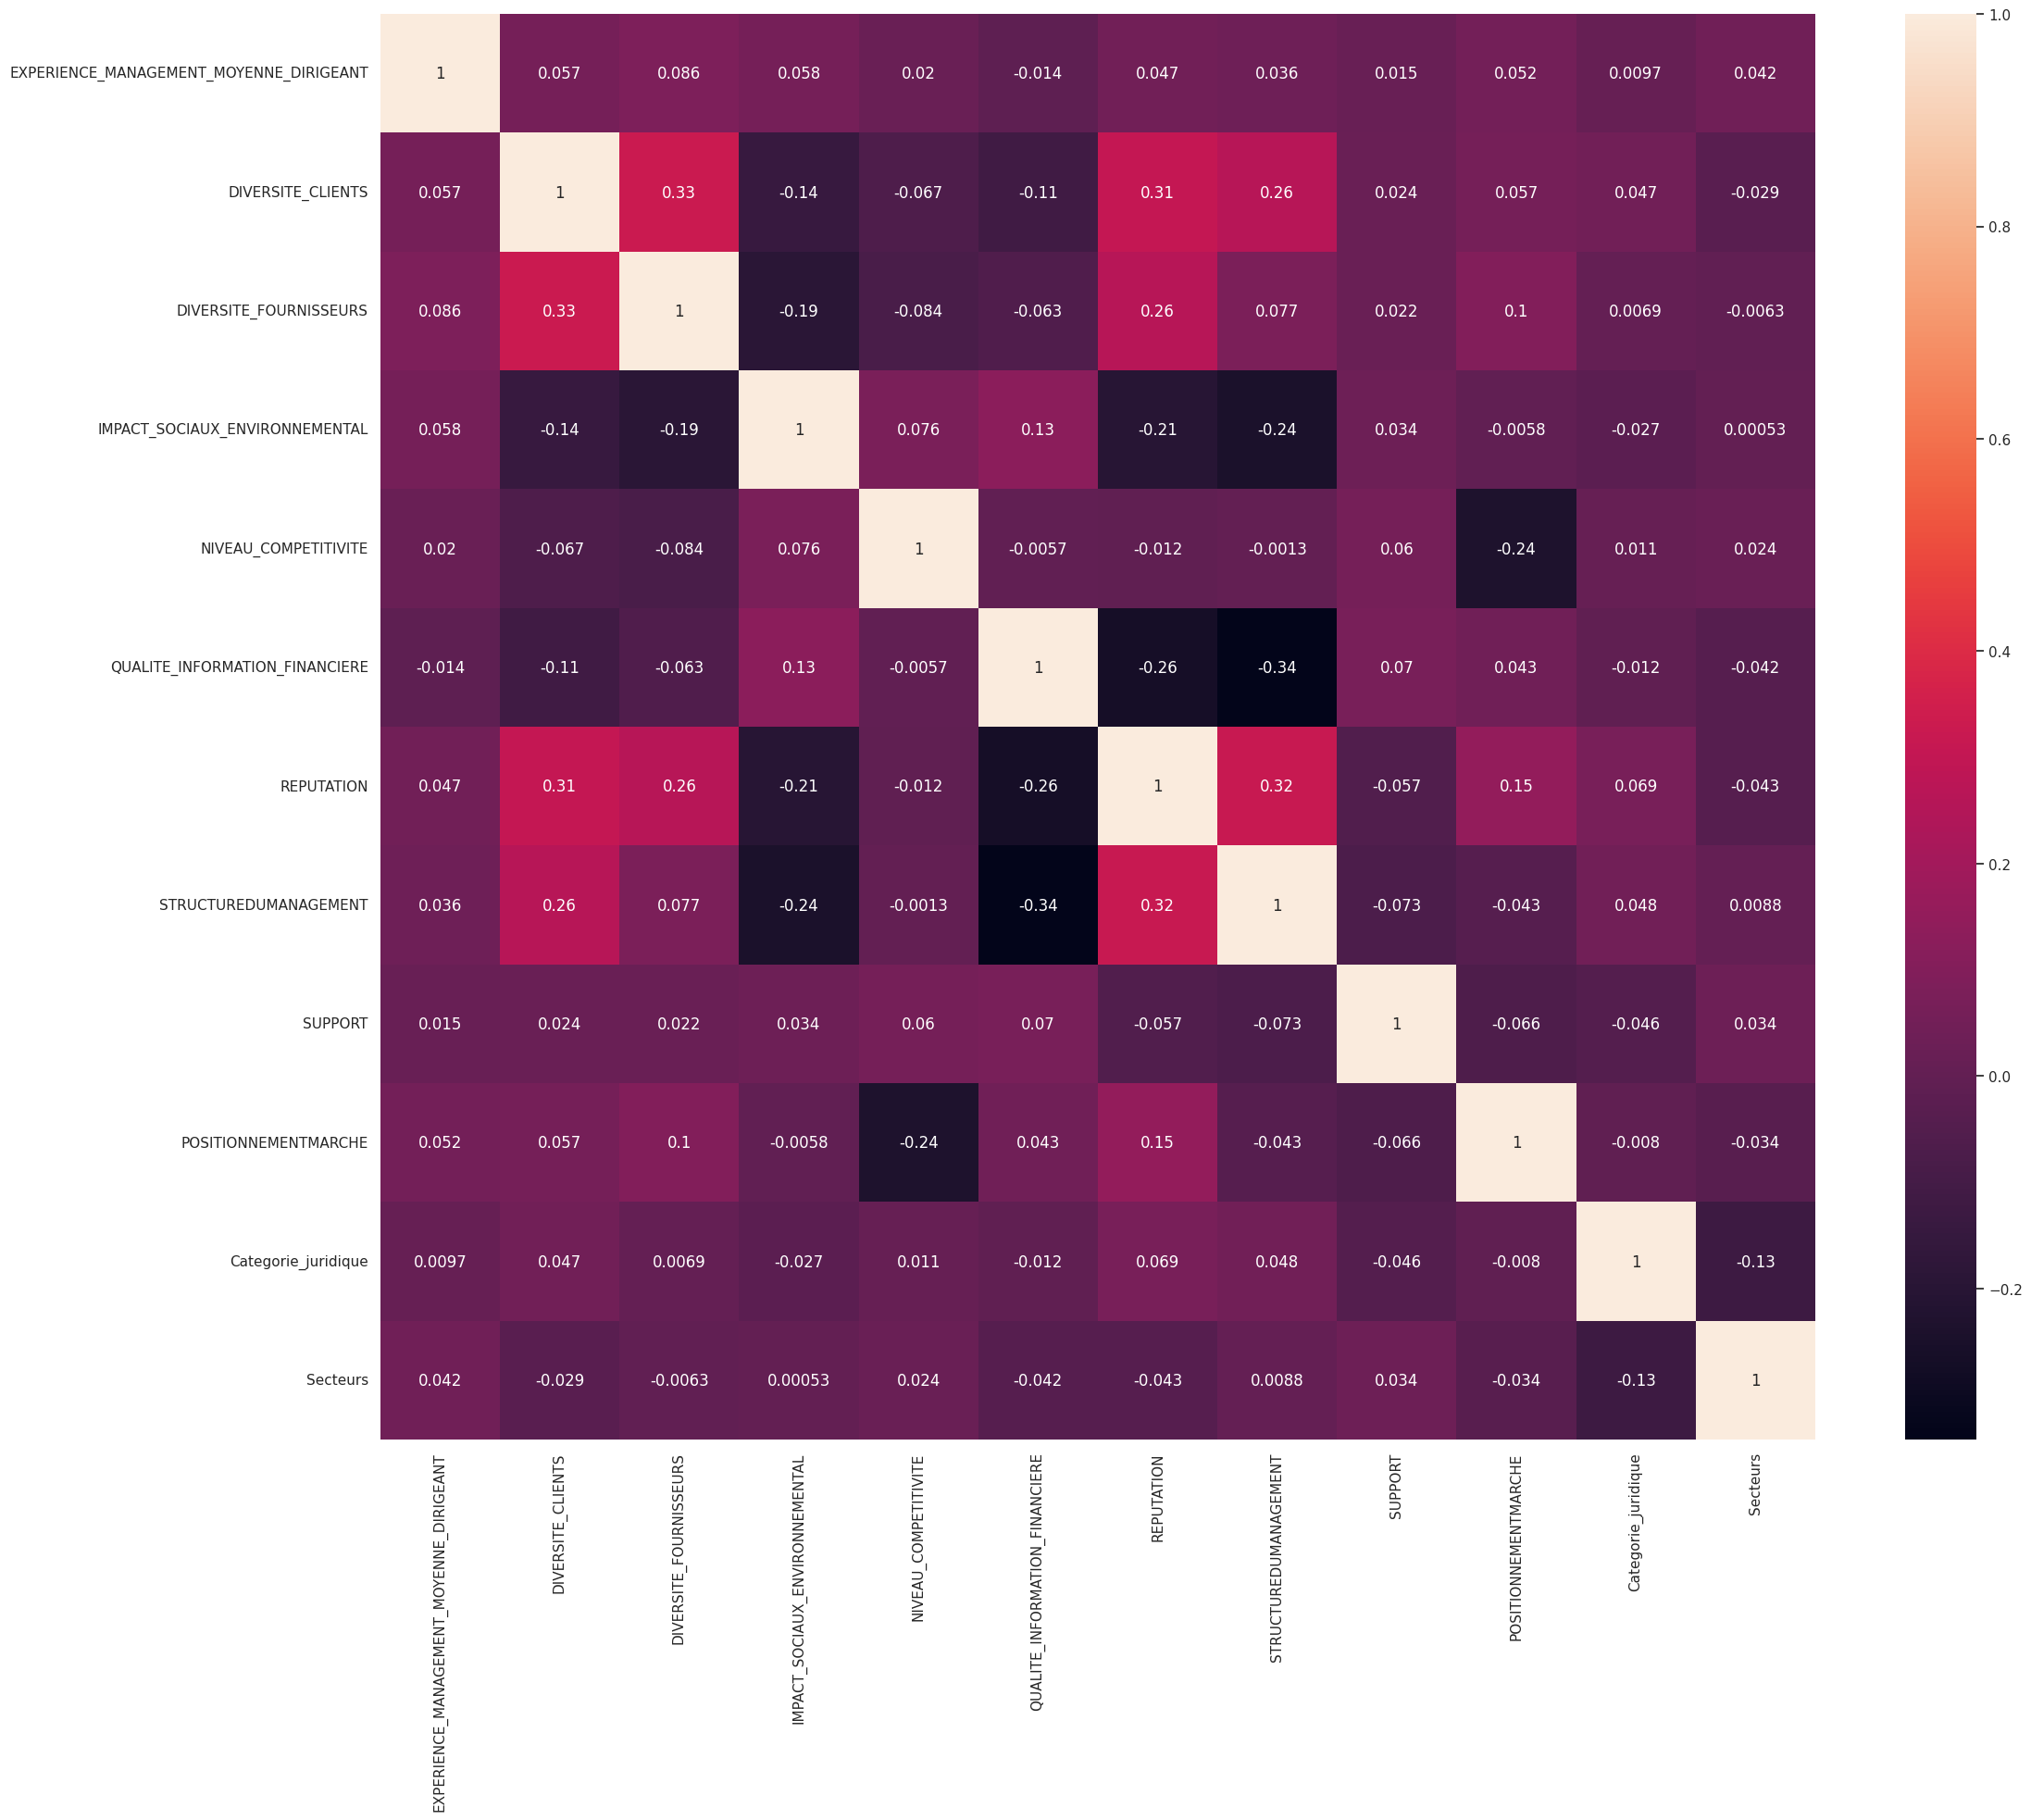

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

**Pearson Correlation Test**

In [ ]:
# Pearsonr Test de Correlation
variables_continues = ['CHIFFRE_AFFAIRES','EXCEDENT_BRUT_EXPLOITATION','RESULTAT_EXPlOITATION','RESULTAT_NET','FINANCEMENT_PERMANENT',
                       'FONDS_DE_ROULEMENT','BESOIN_FONDS_ROULEMENT','CAPITAUX_PROPRES','TRESORIE_NETTE','TOTAL_BILAN',
                       'DETTE_FINANCIERE','ACTIF_CIRCULANT','PASSIF_CIRCULANT','TOTAL_ACTIF','TOTAL_PASSIF','DELAI_REGLEMENT_CLIENTS',
                       'DELAI_REGLEMENT_FOURNISSEURS','AUTO_FINANCEMENT','FRAIS_FINANCIERS','STOCK','EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT']
for var in variables_continues :
    correlation_coefficient, p_value = pearsonr(df[var], df['defaut'])
    print("----------Yahiaa -----------------Bechir----------")
    print(f"Coef. de corrélation pour {var} : {correlation_coefficient}")
    print(f"Valeur P : {p_value}")

----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour CHIFFRE_AFFAIRES : -0.024390908788050433
Valeur P : 0.3418050300506877
----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour EXCEDENT_BRUT_EXPLOITATION : -0.004875846660911164
Valeur P : 0.8493069263359552
----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour RESULTAT_EXPlOITATION : -0.025188550491447647
Valeur P : 0.32624688229237064
----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour RESULTAT_NET : -0.03459440490694676
Valeur P : 0.1775052716507596
----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour FINANCEMENT_PERMANENT : -0.005048914947694478
Valeur P : 0.8440254879027491
----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour FONDS_DE_ROULEMENT : -0.005981764955655252
Valeur P : 0.8156844360475648
----------Yahiaa -----------------Bechir----------
Coef. de corrélation pour BESOIN_FONDS_ROUL

**Décision : Si le coefficient de corrélation est significativement différent de zéro et la valeur p est basse, cela suggère une relation linéaire significative.**

**Action : Incluez les variables continues avec des coefficients de corrélation significativement différents de zéro et des valeurs p basses dans votre modèle.**

En fonction de ces résultats, il semble qu'il n'y ait pas de corrélation linéaire significative entre les variables continues et la variable cible "defaut". Cela signifie que, du point de vue de la corrélation linéaire, ces variables continues ne sont pas fortement associées à la variable cible.

## **Model Creation**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
  data[col] = label_encoder.fit_transform(data[col])


In [ ]:
def Yahia_Bechir(model):
    over = SMOTE()
    scaler = StandardScaler()

    f1 = data[['Annee','EXCEDENT_BRUT_EXPLOITATION', 'TRESORIE_NETTE','DELAI_REGLEMENT_FOURNISSEURS','EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT','REPUTATION', 'SUPPORT','Cote en bourse']]

    t1 = data['defaut']

    f1 = scaler.fit_transform(f1)
    f1, t1 = over.fit_resample(f1, t1)
    Counter(t1)

    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.2, random_state=42)

    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    roc_auc=roc_auc_score(y_pred,y_test,average='weighted')
    print('classification_report:', classification_report(y_test, y_pred))
    print('roc_auc_score:',roc_auc)
    print('')
    print('')
    print("----------Yahiaa -----------------Bechir----------")
    print('')
    print('')

## **Models Evaluation**

In [ ]:
Classifiers={
    'LogisticRegression':LogisticRegression(random_state=42, class_weight='balanced'),
             'DecisionTreeClassifier':DecisionTreeClassifier(),
             "AdaBoost": AdaBoostClassifier()
             }
for Classifier in Classifiers.keys():
    print(Classifier)
    Yahia_Bechir(Classifiers[Classifier])

LogisticRegression
classification_report:               precision    recall  f1-score   support

           0       0.67      0.59      0.63       299
           1       0.62      0.70      0.66       289

    accuracy                           0.64       588
   macro avg       0.64      0.64      0.64       588
weighted avg       0.64      0.64      0.64       588

roc_auc_score: 0.6435185185185186


----------Yahiaa -----------------Bechir----------


DecisionTreeClassifier
classification_report:               precision    recall  f1-score   support

           0       0.96      0.92      0.94       299
           1       0.92      0.96      0.94       289

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588

roc_auc_score: 0.9390471120574927


----------Yahiaa -----------------Bechir----------


AdaBoost
classification_report:               precision    recall  f1-score   su